In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import linregress
from scipy.signal import medfilt

In [2]:
d1V = pd.read_csv("Osciloscopio/1.5/CH1.CSV")
d1I = pd.read_csv("Osciloscopio/1.5/CH2.CSV")

d2V = pd.read_csv("Osciloscopio/2/CH1.CSV")
d2I = pd.read_csv("Osciloscopio/2/CH2.CSV")

In [3]:
V1 = d1V["v"].values
I1 = d1I["v"].values

V2 = d2V["v"].values
I2 = d2I["v"].values

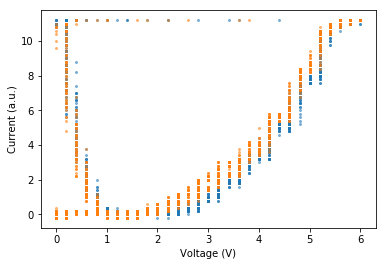

In [4]:
plt.plot(V1, I1, "o", ms = 2, alpha = 0.5)
plt.plot(V2, I2, "o", ms = 2, alpha = 0.5)

plt.xlabel("Voltage (V)")
plt.ylabel("Current (a.u.)")
plt.show()

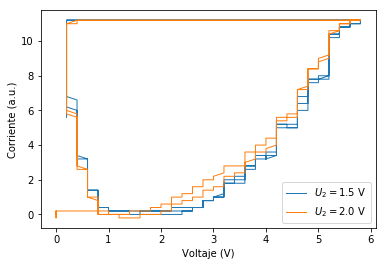

In [5]:
plt.plot(medfilt(V1, kernel_size=35), medfilt(I1, kernel_size = 35), lw = 1, label = "$U_2 = 1.5$ V")
plt.plot(medfilt(V2, kernel_size=35), medfilt(I2, kernel_size = 35), lw = 1, label = "$U_2 = 2.0$ V")

plt.xlabel("Voltaje (V)")
plt.ylabel("Corriente (a.u.)")
plt.legend()
plt.savefig("oscilloscope.pdf")
plt.show()

In [6]:
data1 = np.vstack((d1V["t"].values, d1V["v"].values))
data1 = np.vstack((data1, d1I["v"].values)).T
df1 = pd.DataFrame(data = data1, columns=["t", "V", "I"])

In [7]:
data2 = np.vstack((d2V["t"].values, d2V["v"].values))
data2 = np.vstack((data2, d2I["v"].values)).T
df2 = pd.DataFrame(data = data2, columns=["t", "V", "I"])

In [8]:
d1 = df1.groupby("V").mean()
d2 = df2.groupby("V").mean()

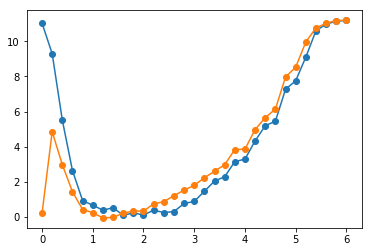

In [9]:
plt.plot(d1["I"], "-o")
plt.plot(d2["I"], "-o")
plt.show()

# Medidas T

In [10]:
valores = ["170", "175", "180", "185"]

dfs = [pd.read_excel("Medida_175/Medida%s.xlsx"%i, sheet_name = None) for i in valores]

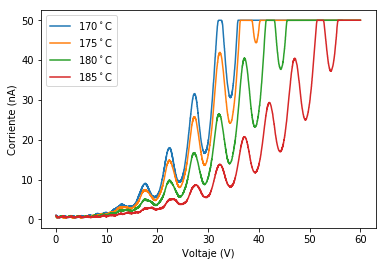

In [11]:
for (i, t) in enumerate(valores):
    df = dfs[i]["Hoja2"].values
    x, y = df[2:].T
    plt.plot(x, y, label = r"%s$^\circ$C"%t)
    
plt.xlabel("Voltaje (V)")
plt.ylabel("Corriente (nA)")
plt.legend()
plt.savefig("alltemp.pdf")
plt.show()

[4.91 4.95 5.11]
[4.91 4.9  5.06 5.03]
[24.25  4.9   4.91  4.91  5.2 ]
[23.81  5.32  4.66  4.91  4.91  4.93  5.06]


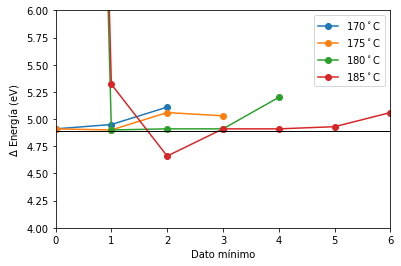

In [12]:
for (i, t) in enumerate(valores):
    df = dfs[i]["Hoja1"]
    minimos = (df["tipo"] == "mínimo")
    maximos = (df["tipo"] == "máximo")
    
    df = df[["U1[V]", "IA[nA]"]]
    x, y = df[minimos].values.T
    
    x = np.diff(x)
    print(x)
    plt.plot(x, "-o", label = r"%s$^\circ$C"%t)

plt.plot([-1, 7], [4.89, 4.89], c = "k", lw = 1)

plt.xlabel("Dato mínimo")
plt.ylabel("$\Delta$ Energía (eV)")
plt.xlim(0, 6)
plt.ylim(4.0, 6.0)
plt.legend()
plt.savefig("energy.pdf")
plt.show()

# $U_2$

In [13]:
from glob import glob

files = sorted(glob("Medida_U2/*"))

data = [np.genfromtxt(file, delimiter = "\t", skip_header = 3, dtype = str) for file in files]

for k in range(5):
    for i in range(data[k].shape[0]):
        for j in range(2):
            data[k][i, j] = data[k][i, j].replace(",", ".")
    data[k] = data[k].astype(float)

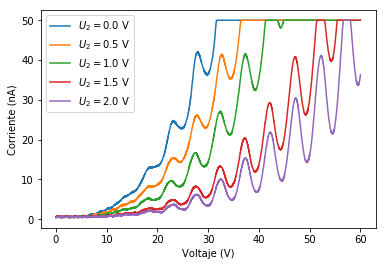

In [14]:
valores = ["0.0", "0.5", "1.0", "1.5", "2.0"]

for (i, t) in enumerate(valores):
    x, y = data[i].T
    plt.plot(x, y, label = r"$U_2 = %s$ V"%t)
    
plt.xlabel("Voltaje (V)")
plt.ylabel("Corriente (nA)")
plt.legend()
plt.savefig("u2.pdf")
plt.show()

# $U_H$

In [15]:
files = sorted(glob("Medida_UH/*"))

data = [np.genfromtxt(file, delimiter = "\t", skip_header = 3, dtype = str) for file in files]

for k in range(3):
    for i in range(data[k].shape[0]):
        for j in range(2):
            data[k][i, j] = data[k][i, j].replace(",", ".")
    data[k] = data[k].astype(float)

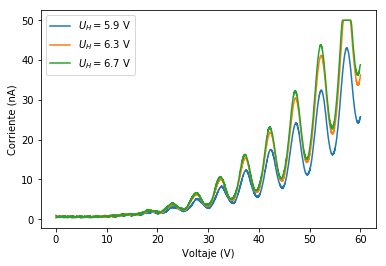

In [16]:
valores = ["5.9", "6.3", "6.7"]

for (i, t) in enumerate(valores):
    x, y = data[i].T
    plt.plot(x, y, label = r"$U_H = %s$ V"%t)
    
plt.xlabel("Voltaje (V)")
plt.ylabel("Corriente (nA)")
plt.legend()
plt.savefig("uh.pdf")
plt.show()

# Camino libre

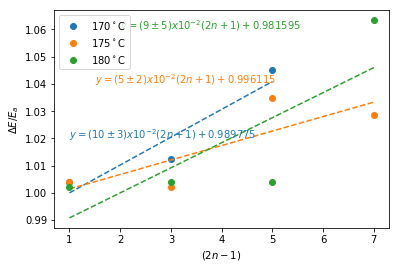

In [17]:
valores = ["170", "175", "180", "185"]

ms = []
dms = []

for (i, t) in enumerate(valores[:-1]):
    df = dfs[i]["Hoja1"]
    minimos = (df["tipo"] == "mínimo")
    
    df = df[["U1[V]", "IA[nA]"]]
    x, y = df[minimos].values.T
    y = np.diff(x)
    y = y[y < 6] / 4.89
    x = np.arange(0, len(y)) + 1
    x = 2*x - 1
    
    c = plt.plot(x, y, "o", label = r"%s$^\circ$C"%t)[0].get_color()
    ans = linregress(x, y)
    m, b = ans[0:2]
    dm = ans[-1]
        
    y = m*x + b
    plt.plot(x, y, "--", c = c)
    
    factor = np.log10(dm)
    mult = 10**np.ceil(abs(factor))
    
    ms.append(m)
    dms.append(dm)
    
    m *= mult
    dm *= mult
    
    plt.text(1 + 0.5*i, 1.02 + 0.02*i, "$y = (%d \pm %d)x10^{%d} (2n + 1) + %f$"%(m, dm, factor, b), color = c)
        
plt.xlabel("$(2n - 1)$")
plt.ylabel("$\Delta E / E_a$")
plt.legend()
plt.savefig("regression.pdf")
plt.show()

In [18]:
def getP(T):
    return 8.7*10**(9 - 3110/T)

sigma = np.pi * (171e-12)**2

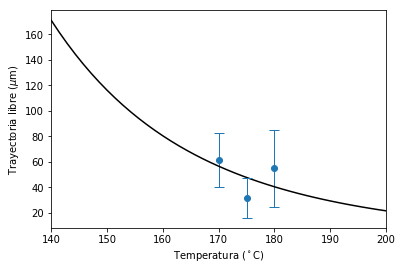

In [19]:
from scipy.constants import k, m_e

T = np.linspace(140, 210) + 273
l = k * T / (np.sqrt(2) * getP(T) * sigma)

ms = np.array(ms)
dms = np.array(dms)

plt.plot(T - 273, l*1e6, c = "k")

T = np.array([170, 175, 180])
l = ms * (6e3)
dl = (dms / ms) * l 
plt.errorbar(T, l, fmt = 'o', yerr = dl, capthick = 1, capsize = 5, elinewidth = 1)

plt.xlabel("Temperatura ($^\circ$C)")
plt.ylabel("Trayectoria libre ($\mu$m)")
plt.xlim(140, 200)
plt.savefig("meanpath.pdf")
plt.show()

In [20]:
# def getf(v, T):
#     exp = np.exp(-m_e*v**2/(2*k*T))
#     return 4*np.pi*v**2*(m_e/(2*np.pi*k*T))**(3/2)*exp

def getf(v, T):
    exp = np.exp(-0.001*v**2/T)
    val = v**2*T**(-3/2)*exp
    return val / np.trapz(val)

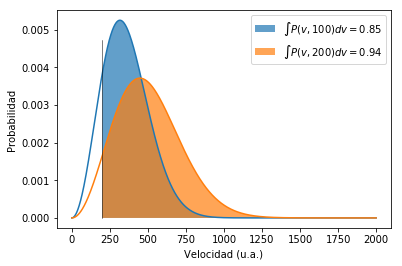

In [21]:
v0 = 200

v = np.linspace(0, 10*v0, 1000)

p1 = getf(v, 100)
p2 = getf(v, 200)

pos = v > v0

i1 = np.trapz(p1[pos])
i2 = np.trapz(p2[pos])

c1 = plt.plot(v, p1)
c2 = plt.plot(v, p2)

plt.plot([v0, v0], [0, 0.9*max(p1)], c = "k", lw = 0.5)

plt.fill_between(v[pos], 0, p1[pos], alpha = 0.7, label = "$\int P(v, 100)dv = %.2f$"%i1)
plt.fill_between(v[pos], 0, p2[pos], alpha = 0.7, label = "$\int P(v, 200)dv = %.2f$"%i2)

plt.legend()
plt.xlabel("Velocidad (u.a.)")
plt.ylabel("Probabilidad")

plt.savefig("Maxwell.pdf")
plt.show()